### Aplicando o SentiStrength

In [ ]:
!pip install sentistrength

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sentistrength import PySentiStr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv('dataset_atualizado_06062022_aleatorio.csv')
#data = pd.read_csv('data_sentistrength_geral.csv')

#data.drop_duplicates(['text'], inplace=True)

In [ ]:
data

,id_noticia,author_id,tweet_id,created_at,site,text,rotulacao_manual,id_rotulador
0,22,390540335,1409510298579570699,2021-06-28,G1,"morre em confronto, segundo a pm",0,M
1,18,2606714200,1163791130938486786,2019-08-20,G1,parabéns por identificar um sniper camuflado,1,G
2,26,1398357042,1390373254154575873,2021-05-06,Uol,operação com 25 mortos no jacarezinho é a mais...,0,S
3,18,79226451,1163942221449715712,2019-08-20,UOL,já teve minimi,0,S
4,23,23268961,1262814697222483970,2020-05-19,G1,morreu como? ele foi assassinado de forma cova...,-1,M
...,...,...,...,...,...,...,...,...
2995,26,57780014,1390443239329701890,2021-05-06,Folha,"puts, menos de 200 traficantes mortos, não vou...",-1,G
2996,25,17631203,1115233403610312704,2019-04-08,Folha,a deu um novo nome pra execução e tentativa de...,-1,S
2997,20,708683504637317121,1175504587089948672,2019-09-21,Folha,que bando de gente recalcada com a pm!!!,-1,M
2998,23,921575438614441984,1262971602104463360,2020-05-20,G1,eu não perco meu tempo discutindo com marionet...,-1,G


In [ ]:
comentarios = list(data['text'].values)

In [ ]:
senti = PySentiStr()
senti.setSentiStrengthPath('SentiStrength.jar')
senti.setSentiStrengthLanguageFolderPath('Data/')

In [ ]:
sentiment = []
for comentario in comentarios:
  result = senti.getSentiment(comentario, score='scale')
  sentiment.append(result[0])

In [ ]:
result = senti.getSentiment('Eu te amo, mas odeio o clima político atual.', score='scale')
print(result)


[-3]


In [ ]:
data

,id_noticia,author_id,tweet_id,created_at,site,text,rotulacao_manual,id_rotulador,Sentimento
0,22,390540335,1409510298579570699,2021-06-28,G1,"morre em confronto, segundo a pm",0,M,0
1,18,2606714200,1163791130938486786,2019-08-20,G1,parabéns por identificar um sniper camuflado,1,G,0
2,26,1398357042,1390373254154575873,2021-05-06,Uol,operação com 25 mortos no jacarezinho é a mais...,0,S,-3
3,18,79226451,1163942221449715712,2019-08-20,UOL,já teve minimi,0,S,0
4,23,23268961,1262814697222483970,2020-05-19,G1,morreu como? ele foi assassinado de forma cova...,-1,M,0
...,...,...,...,...,...,...,...,...,...
2995,26,57780014,1390443239329701890,2021-05-06,Folha,"puts, menos de 200 traficantes mortos, não vou...",-1,G,-2
2996,25,17631203,1115233403610312704,2019-04-08,Folha,a deu um novo nome pra execução e tentativa de...,-1,S,0
2997,20,708683504637317121,1175504587089948672,2019-09-21,Folha,que bando de gente recalcada com a pm!!!,-1,M,1
2998,23,921575438614441984,1262971602104463360,2020-05-20,G1,eu não perco meu tempo discutindo com marionet...,-1,G,-3


In [ ]:
sentiment

In [ ]:
data['Sentimento'] = sentiment

In [ ]:
data.to_csv('data_sentistrength_0606.csv')

### Gerando os gráficos

In [ ]:
data = pd.read_csv('data_sentistrength_0606.csv')

In [ ]:
#data = data.drop(['Unnamed: 0'], axis=1)

In [ ]:
data['Sentimento'].value_counts().sort_index(ascending=False)

 3       8
 2      56
 1     346
 0    1144
-1     697
-2     613
-3     130
-4       6
Name: Sentimento, dtype: int64

In [ ]:
data.loc[data['id_noticia']==18].loc[data['Sentimento']==1]

,Unnamed: 0,id_noticia,author_id,tweet_id,created_at,site,text,rotulacao_manual,id_rotulador,Sentimento
86,86,18,1087516737170485248,1163800260105375744,2019-08-20,UOL,parabéns aos policias ! honraram a farda e pr...,1,S,1
110,110,18,1130288400479739904,1163855271325831168,2019-08-20,Folha,e a gasolina era fanta laranja kkkkkk,0,S,1
142,142,18,33991083,1163796617021087747,2019-08-20,G1,o cpf foi cancelado! kkkkkkkkkkkk,-1,G,1
582,582,18,3239634581,1163878647431913477,2019-08-20,UOL,kkkkkkkkkkkkkkkkkkkkkkkk,0,G,1
619,619,18,1153786995254145024,1163797913086189568,2019-08-20,Folha,e agora está em reunião com o capeta !!! cpf c...,-1,M,1
790,790,18,771513085056147456,1163771486446002176,2019-08-20,G1,quando ele sair sou a favor de jogar ele lá de...,0,M,1
800,800,18,871472063055360001,1163750890962128896,2019-08-20,G1,esperando as pessoas virem justificar com polí...,0,S,1
820,820,18,8802752,1163791743302721536,2019-08-20,G1,"segundo a pm, todos os reféns passavam bem no ...",0,S,1
858,858,18,882347895927836674,1164138259229925378,2019-08-21,UOL,"sei muito bem o que a depressão faz, minha mãe...",-1,G,1
1037,1037,18,108021293,1163806714170396672,2019-08-20,G1,"mais um cpf cancelado os reféns, libertos! #s...",1,S,1


In [ ]:
data['site'].value_counts()

G1       1633
Folha     904
UOL       435
Uol        28
Name: site, dtype: int64

In [ ]:
noticias = [18, 20, 21, 22, 23, 24, 25, 26]

In [ ]:
data.loc[data['id_noticia'] == 22].loc[data['site'] == 'Folha']['Sentimento'].value_counts().sort_values()

Series([], Name: Sentimento, dtype: int64)

In [ ]:
for i in noticias:
  print("Notícia", i)
  print(data.loc[data['id_noticia'] == i]['site'].value_counts())
  print('\n')

Notícia 18
G1       187
UOL      138
Folha     50
Name: site, dtype: int64


Notícia 20
Folha    234
UOL       74
G1        67
Name: site, dtype: int64


Notícia 21
Folha    202
G1       117
UOL       56
Name: site, dtype: int64


Notícia 22
G1     331
UOL     44
Name: site, dtype: int64


Notícia 23
G1       347
UOL       19
Folha      9
Name: site, dtype: int64


Notícia 24
G1       322
Folha     37
UOL       16
Name: site, dtype: int64


Notícia 25
G1       173
Folha    114
UOL       88
Name: site, dtype: int64


Notícia 26
Folha    258
G1        89
Uol       28
Name: site, dtype: int64




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


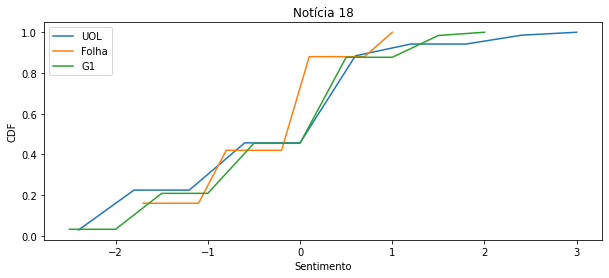

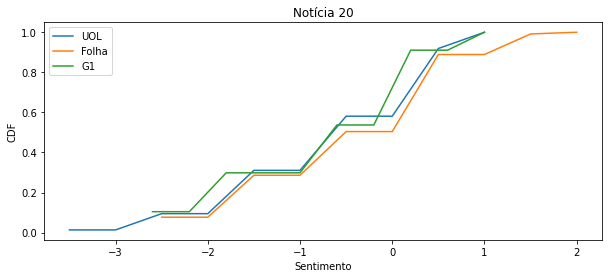

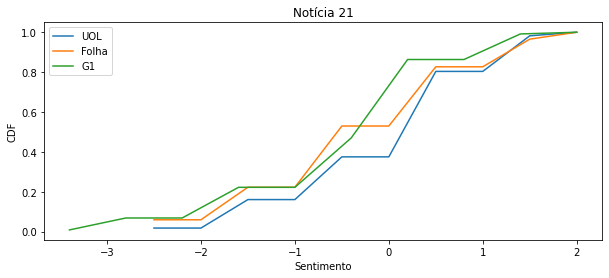

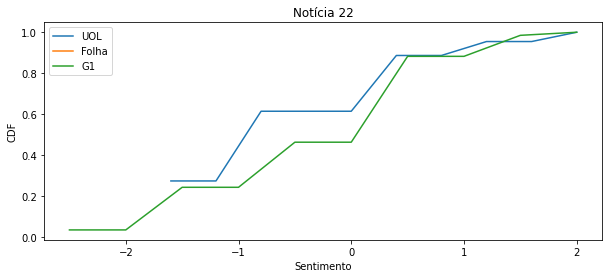

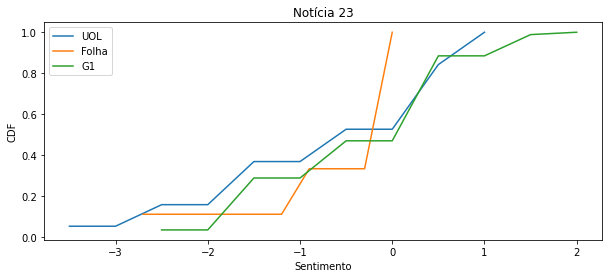

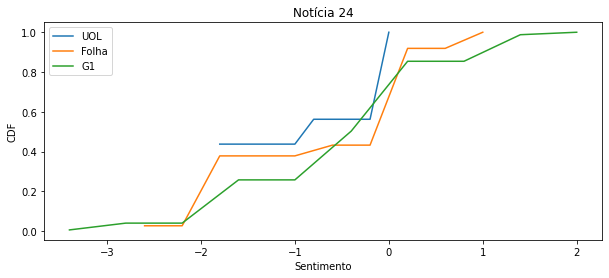

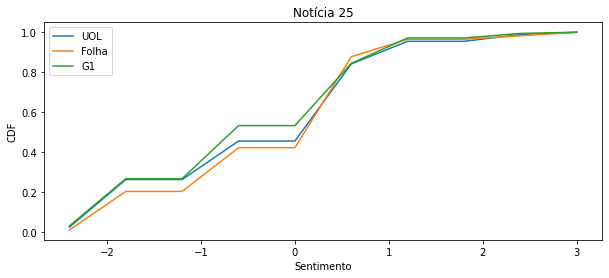

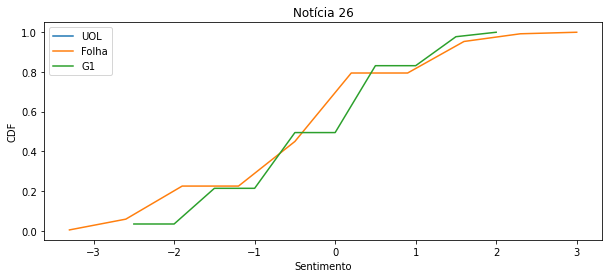

In [ ]:
for i in noticias:
  uol = data.loc[data['id_noticia'] == i].loc[data['site'] == 'UOL']['Sentimento'].values
  folha = data.loc[data['id_noticia'] == i].loc[data['site'] == 'Folha']['Sentimento'].values
  g1 = data.loc[data['id_noticia'] == i].loc[data['site'] == 'G1']['Sentimento'].values
  

  count_uol, bins_count_uol = np.histogram(uol, bins=10)
  pdf_uol = count_uol / sum(count_uol)
  count_folha, bins_count_folha = np.histogram(folha, bins=10)
  pdf_folha = count_folha / sum(count_folha)
  count_g1, bins_count_g1 = np.histogram(g1, bins=10)
  pdf_g1 = count_g1 / sum(count_g1)

  cdf_uol = np.cumsum(pdf_uol)
  cdf_folha = np.cumsum(pdf_folha)
  cdf_g1 = np.cumsum(pdf_g1)
  
  fig, ax = plt.subplots(figsize=(10, 4))
  ax.plot(bins_count_uol[1:], cdf_uol, label='UOL')  # Plot some data on the axes.
  ax.plot(bins_count_folha[1:], cdf_folha, label='Folha')  # Plot more data on the axes...
  ax.plot(bins_count_g1[1:], cdf_g1, label='G1')  # ... and some more.
  ax.set_ylabel('CDF')  # Add an x-label to the axes.
  ax.set_xlabel('Sentimento')  # Add a y-label to the axes.
  ax.set_title("Notícia " + str(i))  # Add a title to the axes.
  ax.legend();
  plt.savefig("noticia_"+str(i)+".pdf")

In [ ]:
data.loc[data['id_noticia'] == 18].loc[data['site'] == 'UOL']['Sentimento'].value_counts()

 0    59
-1    32
-2    27
 1     8
 2     6
-3     4
 3     2
Name: Sentimento, dtype: int64

In [ ]:
data

,Unnamed: 0,id_noticia,author_id,tweet_id,created_at,site,text,rotulacao_manual,id_rotulador,Sentimento
0,0,22,390540335,1409510298579570699,2021-06-28,G1,"morre em confronto, segundo a pm",0,M,0
1,1,18,2606714200,1163791130938486786,2019-08-20,G1,parabéns por identificar um sniper camuflado,1,G,0
2,2,26,1398357042,1390373254154575873,2021-05-06,Uol,operação com 25 mortos no jacarezinho é a mais...,0,S,-3
3,3,18,79226451,1163942221449715712,2019-08-20,UOL,já teve minimi,0,S,0
4,4,23,23268961,1262814697222483970,2020-05-19,G1,morreu como? ele foi assassinado de forma cova...,-1,M,0
...,...,...,...,...,...,...,...,...,...,...
2995,2995,26,57780014,1390443239329701890,2021-05-06,Folha,"puts, menos de 200 traficantes mortos, não vou...",-1,G,-2
2996,2996,25,17631203,1115233403610312704,2019-04-08,Folha,a deu um novo nome pra execução e tentativa de...,-1,S,0
2997,2997,20,708683504637317121,1175504587089948672,2019-09-21,Folha,que bando de gente recalcada com a pm!!!,-1,M,1
2998,2998,23,921575438614441984,1262971602104463360,2020-05-20,G1,eu não perco meu tempo discutindo com marionet...,-1,G,-3


In [ ]:
copia = data.copy()
lista = []
for i in copia['Sentimento'].values:
  print(i)
  if i < -1:
    lista.append(-1)
  elif i > 1:
    lista.append(1)
  else:
    lista.append(0)

copia['Sentimento'] = lista

In [ ]:
copia

,Unnamed: 0,id_noticia,author_id,tweet_id,created_at,site,text,rotulacao_manual,id_rotulador,Sentimento
0,0,22,390540335,1409510298579570699,2021-06-28,G1,"morre em confronto, segundo a pm",0,M,0
1,1,18,2606714200,1163791130938486786,2019-08-20,G1,parabéns por identificar um sniper camuflado,1,G,0
2,2,26,1398357042,1390373254154575873,2021-05-06,Uol,operação com 25 mortos no jacarezinho é a mais...,0,S,-1
3,3,18,79226451,1163942221449715712,2019-08-20,UOL,já teve minimi,0,S,0
4,4,23,23268961,1262814697222483970,2020-05-19,G1,morreu como? ele foi assassinado de forma cova...,-1,M,0
...,...,...,...,...,...,...,...,...,...,...
2995,2995,26,57780014,1390443239329701890,2021-05-06,Folha,"puts, menos de 200 traficantes mortos, não vou...",-1,G,-1
2996,2996,25,17631203,1115233403610312704,2019-04-08,Folha,a deu um novo nome pra execução e tentativa de...,-1,S,0
2997,2997,20,708683504637317121,1175504587089948672,2019-09-21,Folha,que bando de gente recalcada com a pm!!!,-1,M,0
2998,2998,23,921575438614441984,1262971602104463360,2020-05-20,G1,eu não perco meu tempo discutindo com marionet...,-1,G,-1


In [ ]:
print(copia.loc[copia['id_noticia'] == 18].loc[copia['site'] == 'UOL']['Sentimento'].value_counts())

 0    99
-1    31
 1     8
Name: Sentimento, dtype: int64


In [ ]:
data["site"].value_counts()

G1       1633
Folha     904
UOL       435
Uol        28
Name: site, dtype: int64

In [ ]:
import imblearn
from collections import Counter

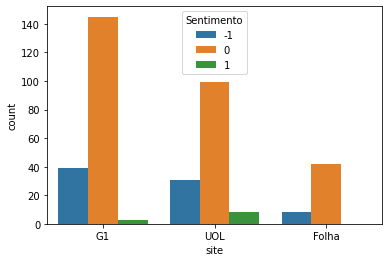

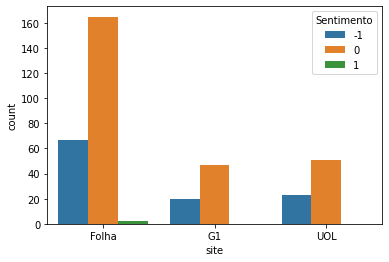

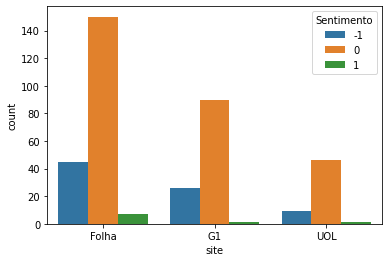

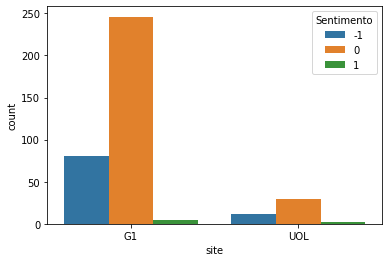

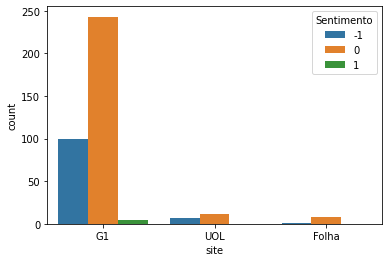

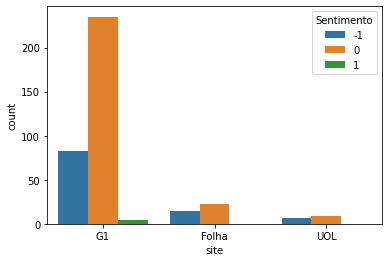

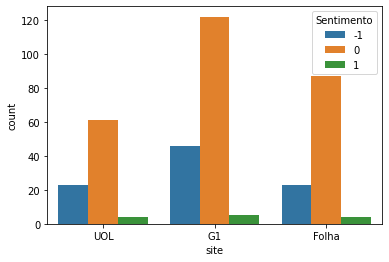

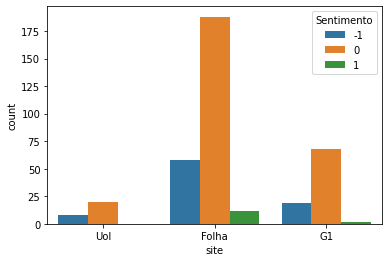

In [ ]:
import seaborn as sns
 
for i in noticias:
  df = copia.loc[copia['id_noticia'] == i]

  # count plot on two categorical variable
  sns.countplot(x ='site', hue = "Sentimento", data = df)
  
  # Show the plot
  plt.show()

In [ ]:
labels, counts = np.unique(data.loc[data['id_noticia'] == i].loc[data['site'] == 'UOL']['Sentimento'].values, return_counts=True)

In [ ]:
max([1, 4, 5])

5

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


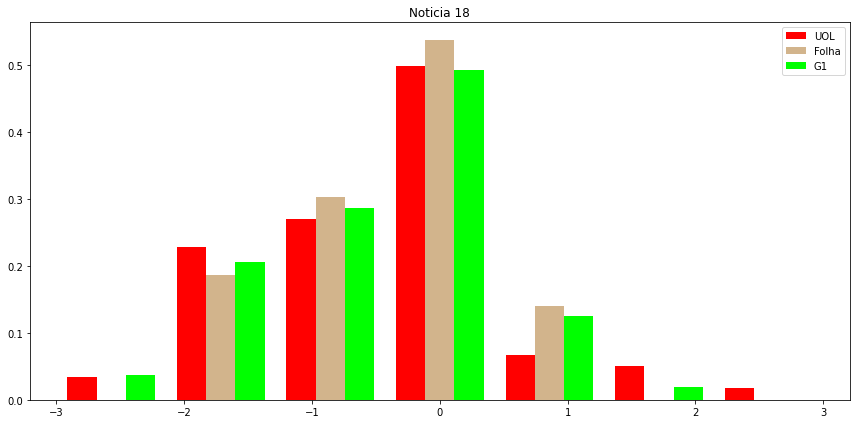

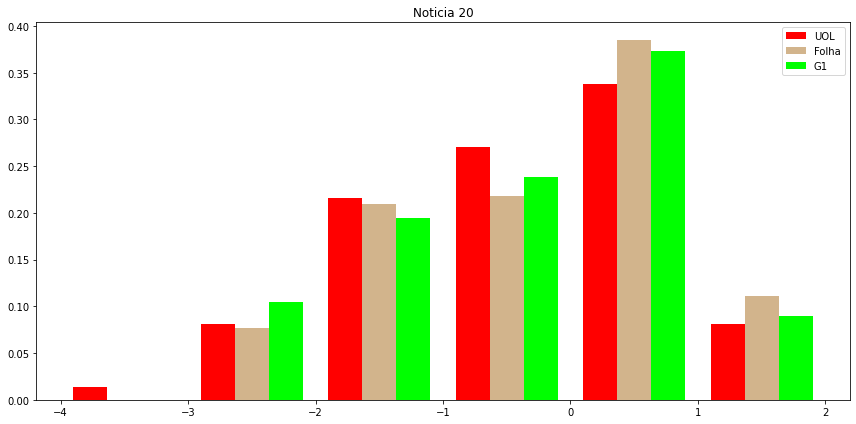

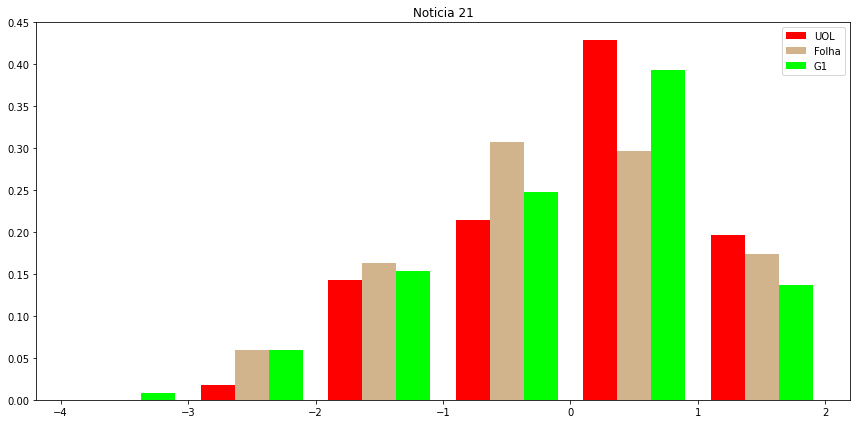

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


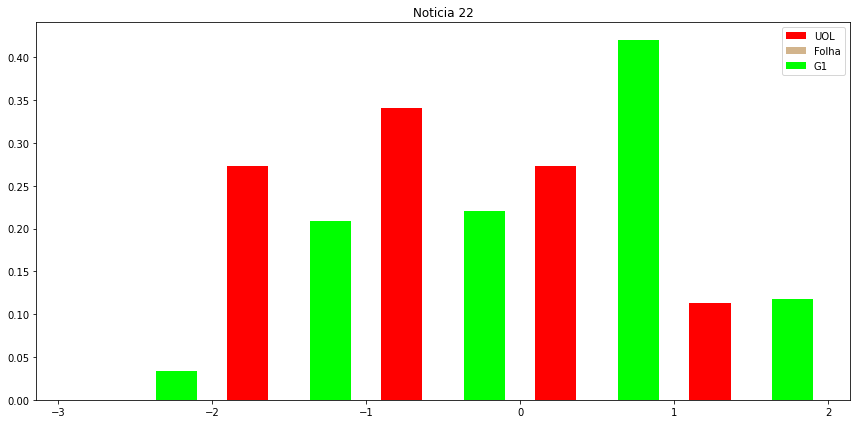

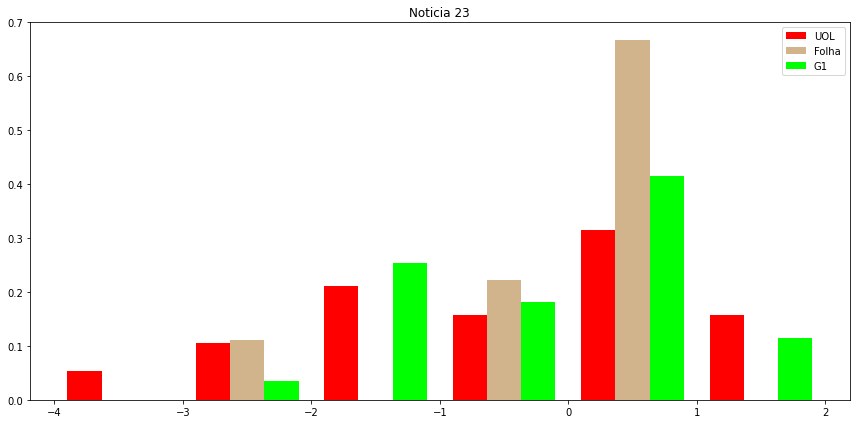

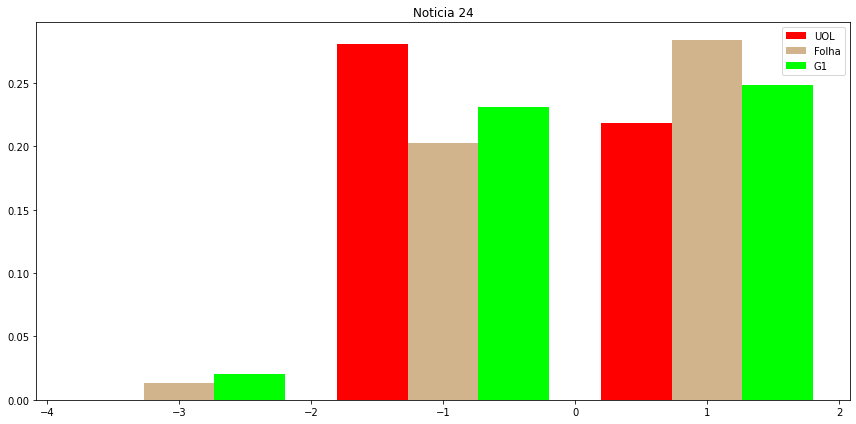

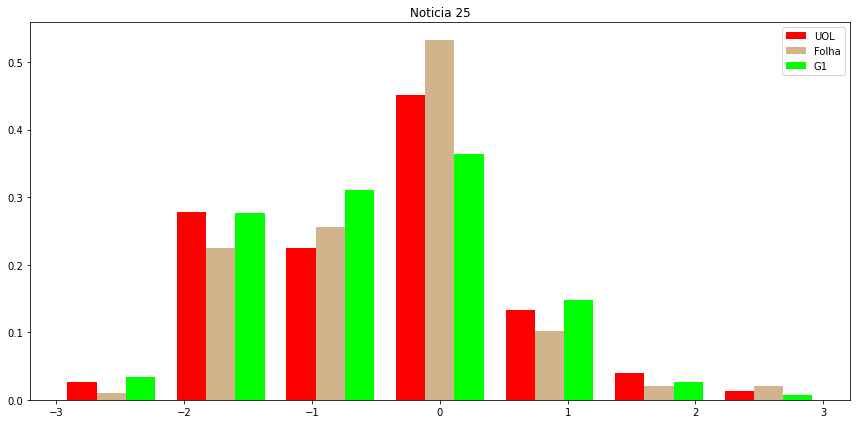

ValueError: ignored

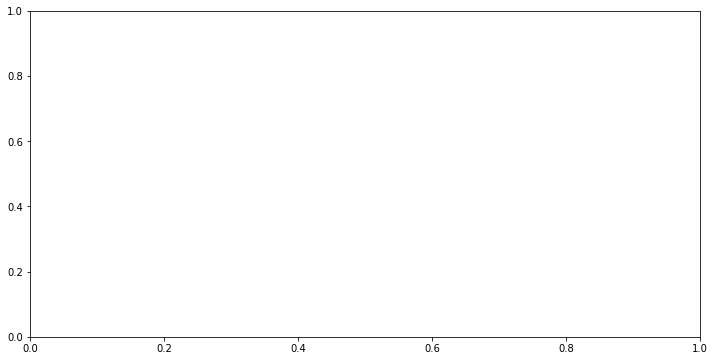

In [ ]:
for i in noticias:

  labels1, counts = np.unique(data.loc[data['id_noticia'] == i].loc[data['site'] == 'UOL']['Sentimento'].values, return_counts=True)
  labels2, counts = np.unique(data.loc[data['id_noticia'] == i].loc[data['site'] == 'UOL']['Sentimento'].values, return_counts=True)
  labels3, counts = np.unique(data.loc[data['id_noticia'] == i].loc[data['site'] == 'UOL']['Sentimento'].values, return_counts=True)

  n_bins = max([len(labels1), len(labels2), len(labels3)])
  x = [data.loc[data['id_noticia'] == i].loc[data['site'] == 'UOL']['Sentimento'].values,
      data.loc[data['id_noticia'] == i].loc[data['site'] == 'Folha']['Sentimento'].values,
      data.loc[data['id_noticia'] == i].loc[data['site'] == 'G1']['Sentimento'].values]

  fig, ax0 = plt.subplots(figsize=(12,6))

  colors = ['red', 'tan', 'lime']
  labels = ['UOL', 'Folha', 'G1']
  ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=labels)
  ax0.legend(prop={'size': 10})
  ax0.set_title('Noticia '+ str(i))

  fig.tight_layout()
  plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


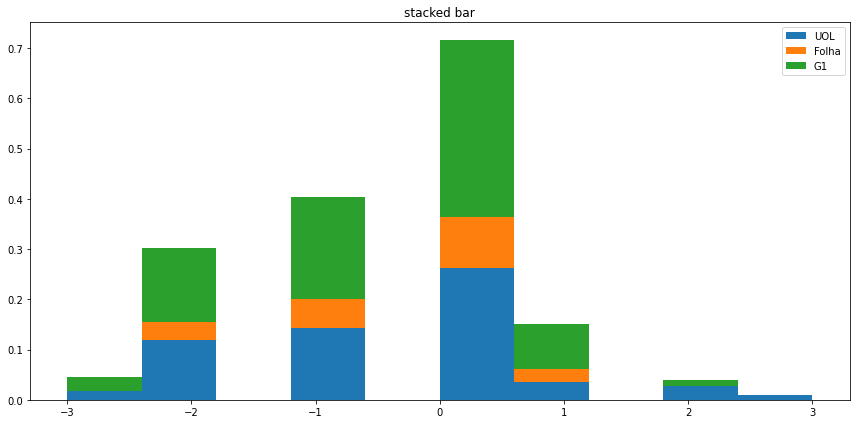

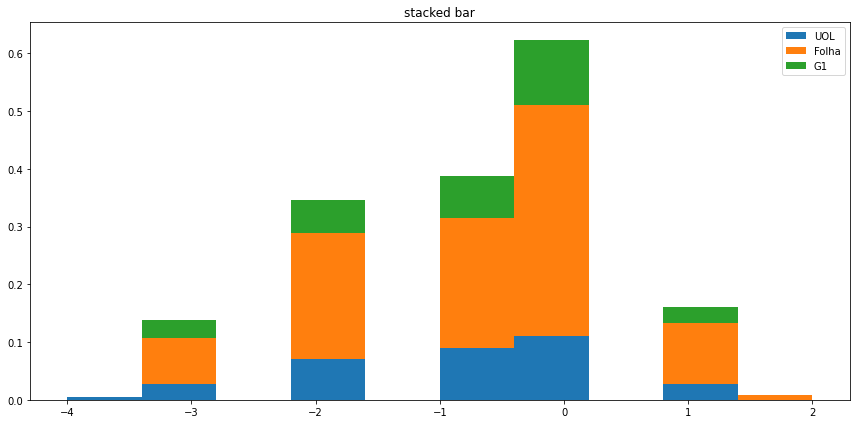

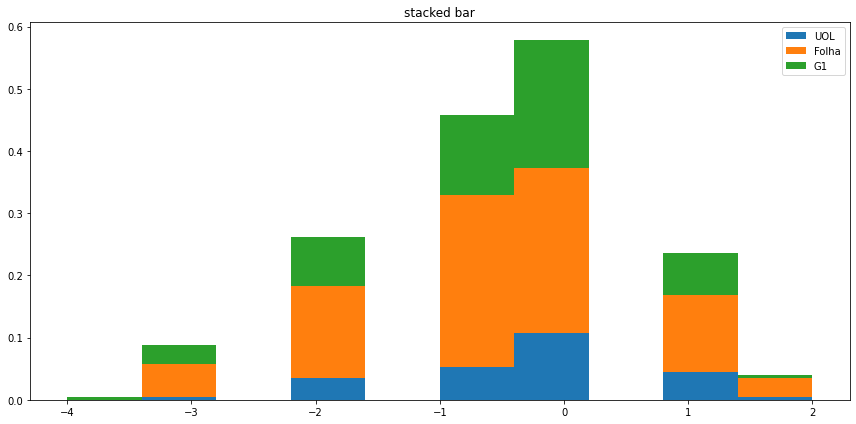

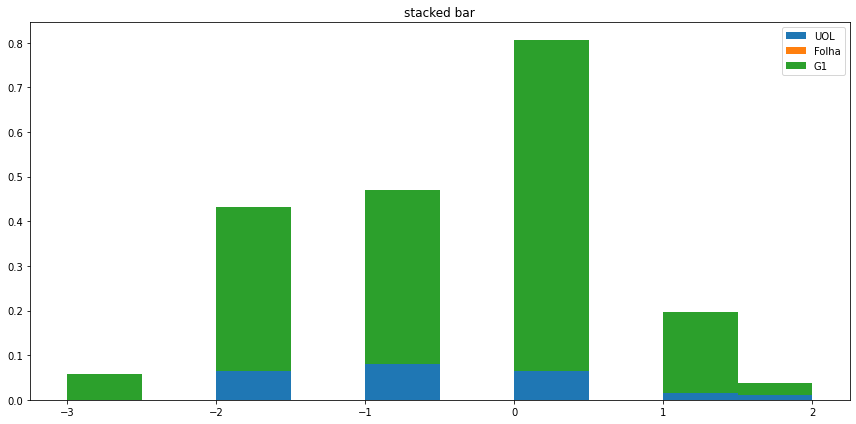

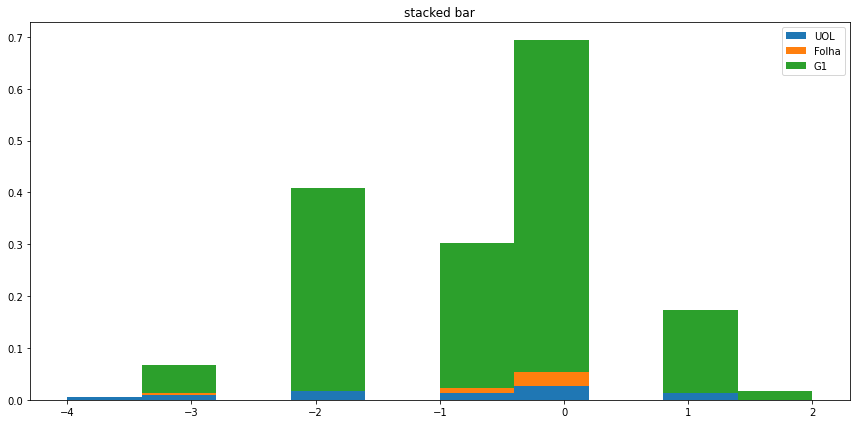

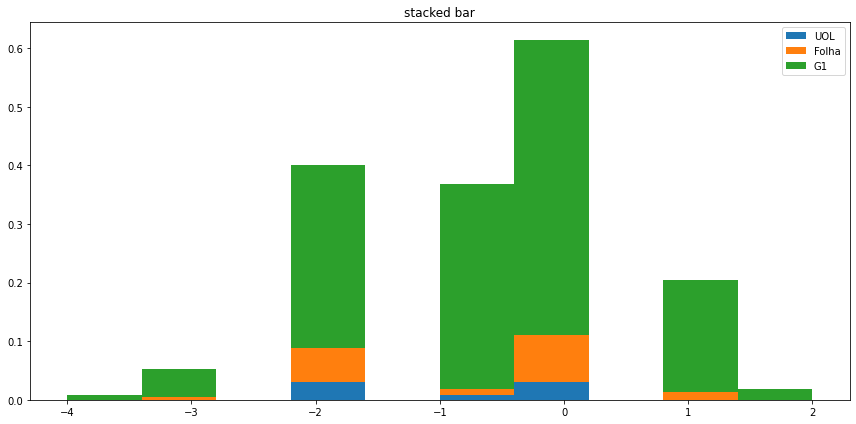

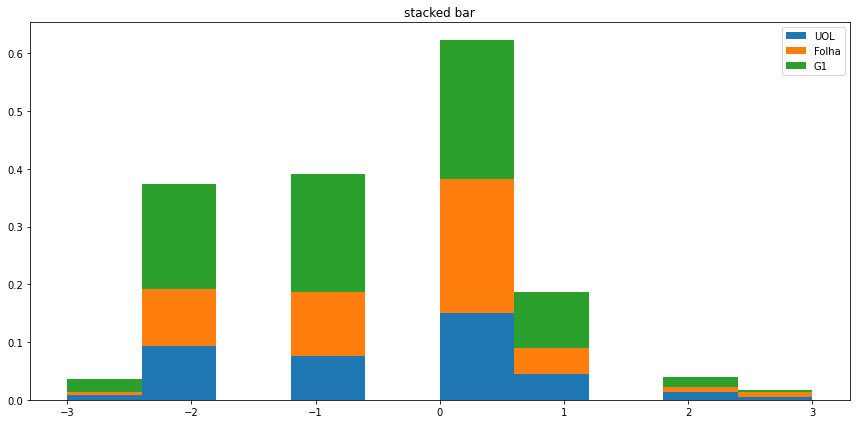

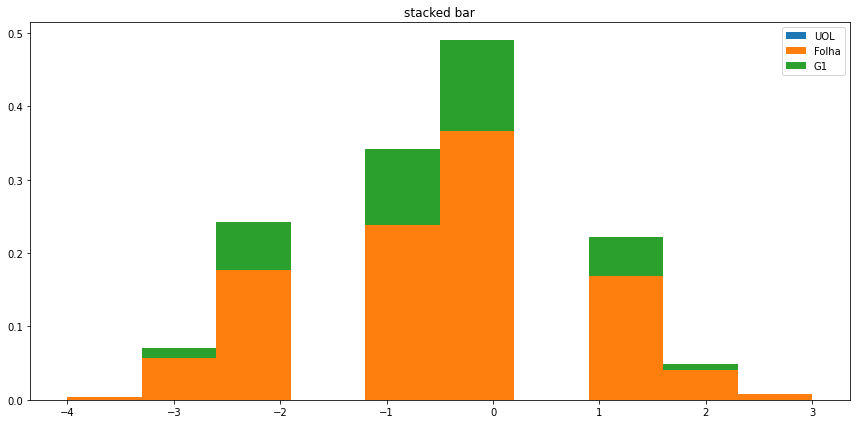

In [ ]:
for i in noticias:
  n_bins = 10
  x = [data.loc[data['id_noticia'] == i].loc[data['site'] == 'UOL']['Sentimento'].values,
      data.loc[data['id_noticia'] == i].loc[data['site'] == 'Folha']['Sentimento'].values,
      data.loc[data['id_noticia'] == i].loc[data['site'] == 'G1']['Sentimento'].values]

  fig, ax1 = plt.subplots(figsize=(12,6))

  colors = ['red', 'tan', 'lime']
  labels = ['UOL', 'Folha', 'G1']
  ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True, label=labels)
  ax1.set_title('stacked bar')
  ax1.legend(prop={'size': 10})

  fig.tight_layout()
  plt.show()

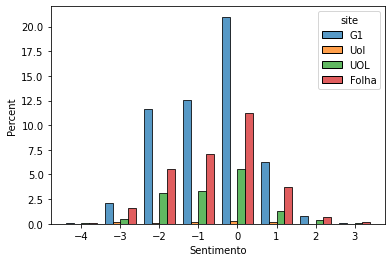

In [ ]:
sns.histplot(x ='Sentimento', hue = "site", data = data, stat="percent", multiple="dodge", discrete=True, shrink=.8)

# Show the plot
plt.show()

In [ ]:
data